In [1]:
pip install opencv-python

In [23]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Function to load and preprocess images
def load_and_preprocess_images(dataset_path, image_size=(128, 128)):
    images = []
    labels = []

    for label, person in enumerate(os.listdir(dataset_path)):
        person_path = os.path.join(dataset_path, person)
        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, image_size)
            images.append(image)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess the dataset
dataset_path = '/content/Datasets'
images, labels = load_and_preprocess_images(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Define the model architecture (a simple CNN for demonstration)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(encoded_labels)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Save the model for future use
model.save('face_recognition_model.h5')

Epoch 1/10
8/8 [==============================] - 6s 692ms/step - loss: 3859.8225 - accuracy: 0.2792 - val_loss: 47.8524 - val_accuracy: 0.4918
Epoch 2/10
8/8 [==============================] - 7s 860ms/step - loss: 134.3492 - accuracy: 0.5625 - val_loss: 109.3990 - val_accuracy: 0.4918
Epoch 3/10
8/8 [==============================] - 5s 632ms/step - loss: 31.5564 - accuracy: 0.5458 - val_loss: 1.0978 - val_accuracy: 0.3443
Epoch 4/10
8/8 [==============================] - 6s 735ms/step - loss: 8.2409 - accuracy: 0.3000 - val_loss: 1.0966 - val_accuracy: 0.3443
Epoch 5/10
8/8 [==============================] - 6s 716ms/step - loss: 1.0805 - accuracy: 0.3333 - val_loss: 1.0936 - val_accuracy: 0.3443
Epoch 6/10
8/8 [==============================] - 5s 643ms/step - loss: 1.0805 - accuracy: 0.3333 - val_loss: 1.0905 - val_accuracy: 0.3443
Epoch 7/10
8/8 [==============================] - 7s 862ms/step - loss: 1.0805 - accuracy: 0.3333 - val_loss: 1.0886 - val_accuracy: 0.3443
Epoch 8/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 95ms/step


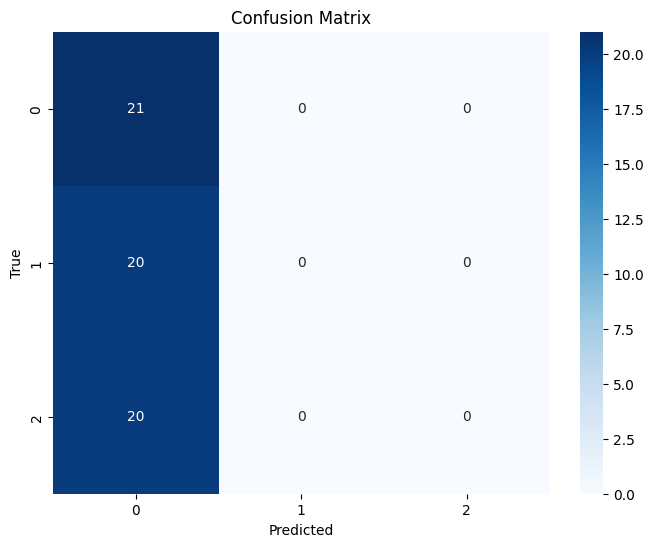

2/2 [==============================] - 0s 81ms/step


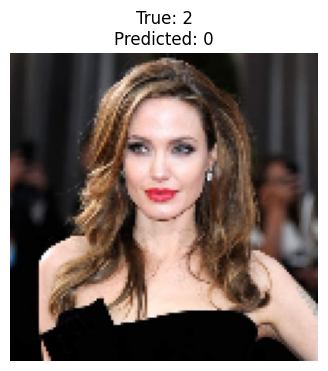

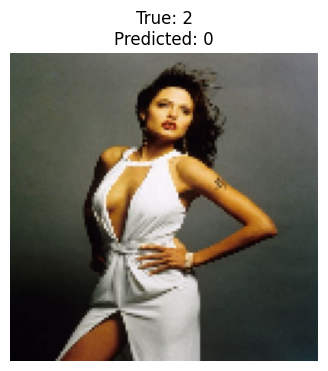

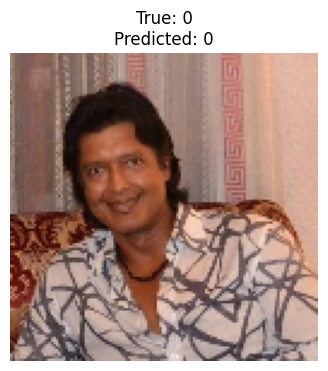

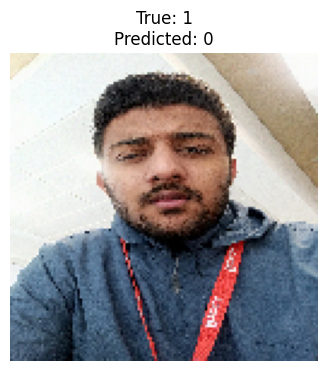

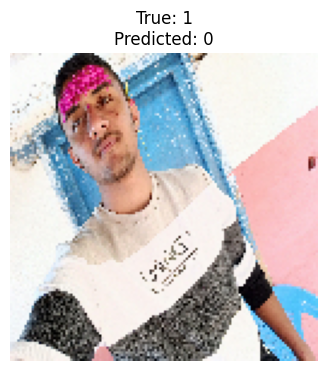

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot sample predictions
def plot_sample_predictions(model, X_test, y_test, label_encoder, num_samples=5):
    predictions = model.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)

    class_names = [str(label_encoder.classes_[i]) for i in range(len(label_encoder.classes_))]

    for i in range(num_samples):
        index = np.random.randint(0, len(X_test))
        image = X_test[index]
        true_label = label_encoder.classes_[y_test[index]]
        predicted_label = label_encoder.classes_[predicted_labels[index]]

        plt.figure(figsize=(4, 4))
        plt.imshow(image)
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')
        plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, model.predict(X_test).argmax(axis=1), label_encoder.classes_)

# Plot sample predictions
plot_sample_predictions(model, X_test, y_test, label_encoder)

In [25]:
from sklearn.metrics import classification_report, accuracy_score

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
original_labels = label_encoder.inverse_transform(y_test)
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

# Calculate accuracy
accuracy = accuracy_score(original_labels, predicted_labels_original)

print("Classification Report:")
print(classification_report(original_labels, predicted_labels_original))

# Print accuracy
print("Model Accuracy:", accuracy)

2/2 [==============================] - 0s 128ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.34      1.00      0.51        21
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20

    accuracy                           0.34        61
   macro avg       0.11      0.33      0.17        61
weighted avg       0.12      0.34      0.18        61

Model Accuracy: 0.3442622950819672


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 1s 221ms/step


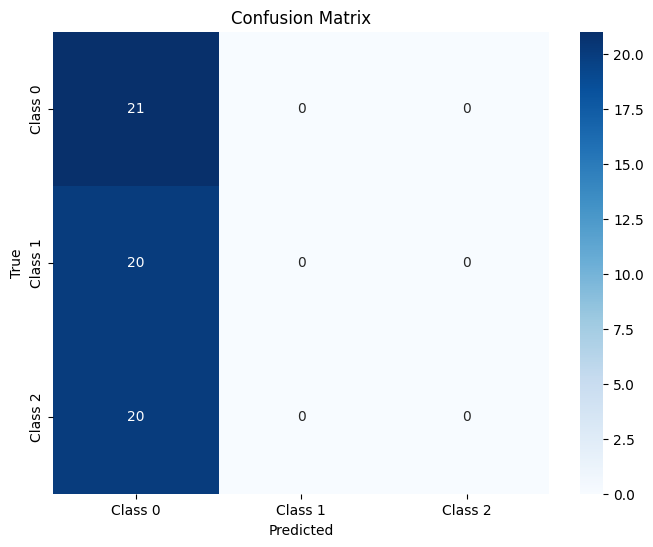

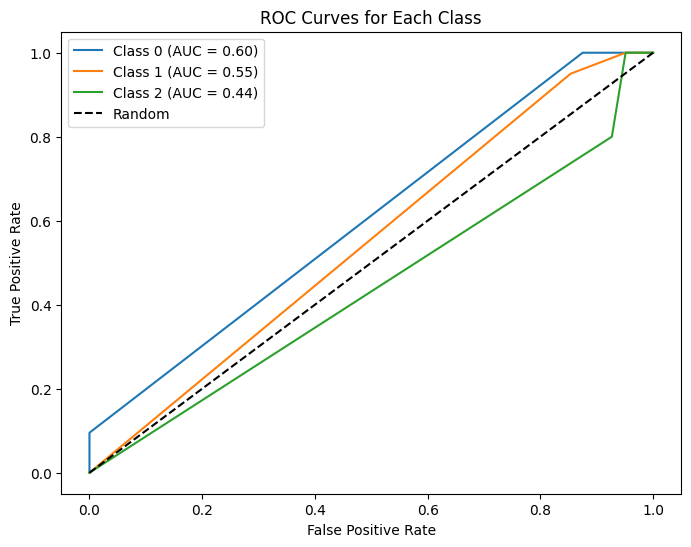

In [26]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot ROC curves
def plot_roc_curves(y_true, y_probs, class_names):
    plt.figure(figsize=(8, 6))

    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Each Class')
    plt.legend()
    plt.show()

# Generate predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Plot confusion matrix
plot_confusion_matrix(y_test, predicted_labels, class_names=['Class 0', 'Class 1', 'Class 2'])

# Plot ROC curves
plot_roc_curves(y_test, predictions, class_names=['Class 0', 'Class 1', 'Class 2'])


Epoch 1/10
8/8 [==============================] - 12s 2s/step - loss: 1.0804 - accuracy: 0.3333 - val_loss: 1.0862 - val_accuracy: 0.3443
Epoch 2/10
8/8 [==============================] - 6s 728ms/step - loss: 1.0804 - accuracy: 0.3333 - val_loss: 1.0860 - val_accuracy: 0.3443
Epoch 3/10
8/8 [==============================] - 6s 706ms/step - loss: 1.0804 - accuracy: 0.3333 - val_loss: 1.0857 - val_accuracy: 0.3443
Epoch 4/10
8/8 [==============================] - 5s 643ms/step - loss: 1.0804 - accuracy: 0.3333 - val_loss: 1.0855 - val_accuracy: 0.3443
Epoch 5/10
8/8 [==============================] - 7s 877ms/step - loss: 1.0804 - accuracy: 0.3333 - val_loss: 1.0853 - val_accuracy: 0.3443
Epoch 6/10
8/8 [==============================] - 5s 658ms/step - loss: 1.0804 - accuracy: 0.3333 - val_loss: 1.0850 - val_accuracy: 0.3443
Epoch 7/10
8/8 [==============================] - 7s 866ms/step - loss: 1.0804 - accuracy: 0.3333 - val_loss: 1.0848 - val_accuracy: 0.3607
Epoch 8/10
8/8 [======

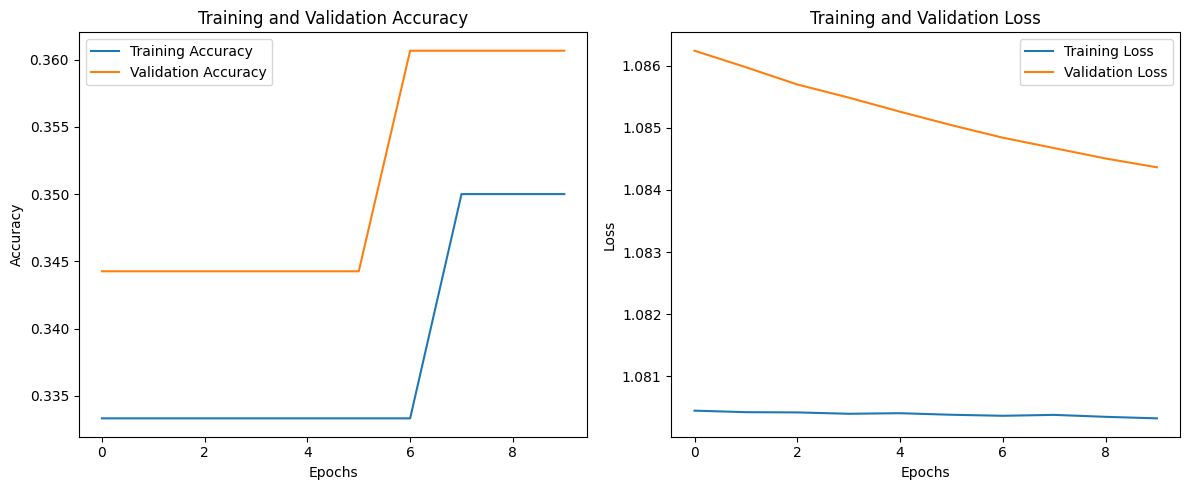

In [27]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()